# Analysis of benchmark results: SVD and LGE kernels

The following cell gets sources of the reading and plotting scripts and registers them as libraries.
```bash
wget https://gitlab.com/eu_hidalgo/hidalgo_bench_suite/-/raw/main/tests/common/python/hbs_plot.py
wget https://gitlab.com/eu_hidalgo/hidalgo_bench_suite/-/raw/main/tests/common/python/hbs_read.py
# rm ./hbs*.py*
```

In [1]:
import os
import sys
import urllib.request
import pandas

sys.path.append(os.getcwd())
for filename in ("hbs_plot.py", 'hbs_read.py'):
    urllib.request.urlretrieve("https://gitlab.com/eu_hidalgo/hidalgo_bench_suite/-/raw/main/tests/common/python/{}".format(filename), filename)
    #eval('from {} import *'.format(os.path.splitext(os. path. basename(filename))[0]))
from hbs_plot import *
from hbs_read import *
prep_sns()

<module 'seaborn' from '/home/hpcgogol/dev/software/python/study/lib/python3.8/site-packages/seaborn/__init__.py'>

Create CSV-reader for benchmark results

In [2]:
reader=HBSReader('.').add_tool('triangle_pruning', ['elapsed_time']).add_tool('compute_table', ['elapsed_time'])
measurements=reader.triangle_pruning()
measurements['elapsed_time'] = measurements['elapsed_time']*1.e-3
#measurements[['hbs_testbed', 'hbs_ncores', 'hbs_dataset', 'hbs_kernel', 'elapsed_time']]

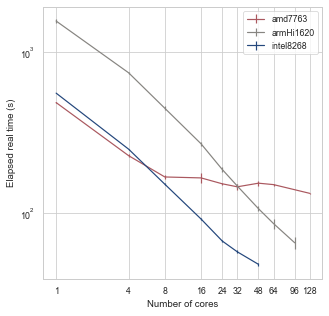

In [3]:
measurements=reader.triangle_pruning(hbs_kernel = 'lge', hbs_dataset = 'europe/ukraine', hbs_testcase = 0, hbs_subkernel='triangle_pruning')
measurements['elapsed_time'] = measurements['elapsed_time']*1.e-3

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_yscale("log")
ax.set_xscale("log")
scalability_plot(ax, reader, measurements, 'elapsed_time')
ax.grid(True)
ax.legend(loc='upper right')
plt.savefig('lge_triangle_pruning.png', dpi=600, bbox_inches='tight', transparent=True)

In [4]:
measurements=reader.compute_table(hbs_kernel = 'lge', hbs_dataset = 'europe/ukraine', hbs_testcase = 0, hbs_subkernel='compute_table')
measurements['elapsed_time'] = measurements['elapsed_time']*1.e-3

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_yscale("log")
ax.set_xscale("log")
scalability_plot(ax, reader, measurements, 'elapsed_time')
ax.grid(True)
ax.legend(loc='upper right')
plt.savefig('lge_compute_table.png', dpi=600, bbox_inches='tight', transparent=True)

In [5]:
reader.time(hbs_kernel = 'svd', hbs_testcase = 0, hbs_ncores=1, agg='mean')

hbs_testbed hbs_subkernel  hbs_dataset  inputs  elapsed_time        memory  \
0     amdMi100    TensorFlow        32000     0.0    123.140000  4.799746e+06   
1       nvA100         Magma         1000     0.0      0.820000  6.318240e+04   
2       nvA100         Magma         2000     0.0      0.860000  6.255600e+04   
3       nvA100         Magma         4000     0.0      1.030000  1.046576e+05   
4       nvA100         Magma         8000     0.0      1.716000  2.917720e+05   
5       nvA100         Magma        16000     0.0      4.402000  1.040970e+06   
6       nvA100         Magma        32000     0.0     15.120000  4.042212e+06   
7       nvA100         Magma        40000     0.0     23.150000  6.291067e+06   
8       nvA100    TensorFlow         1000     0.0      8.050000  4.678004e+06   
9       nvA100    TensorFlow         2000     0.0      8.893333  4.678887e+06   
10      nvA100    TensorFlow         4000     0.0      8.588889  4.679762e+06   
11      nvA100    TensorFlow         8000     0.0     10.403333  4.678341e+06   
12      nvA100    TensorFlow        16000     0.0     21.478000  4.679997e+06   
13      nvA100    TensorFlow        32000     0.0     97.340000  4.679746e+06   
14      nvA100    TensorFlow        40000     0.0    179.015000  4.683350e+06   

    outputs  
0      48.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       0.0  
6       0.0  
7       0.0  
8      40.0  
9      40.0  
10     40.0  
11     40.0  
12     40.0  
13     48.0  
14     48.0

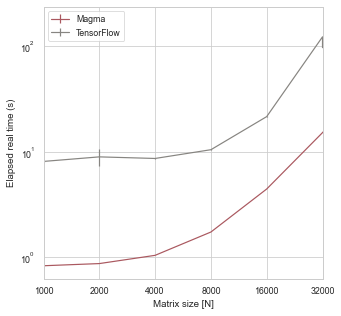

In [6]:
# measurements=reader.perf(hbs_kernel = 'svd', hbs_subkernel='TensorFlow', hbs_testcase = 0, hbs_ncores=1, agg='mean')
measurements=reader.time(hbs_kernel = 'svd', hbs_testcase = 0, hbs_ncores=1)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_yscale("log")
ax.set_xscale("log")
scalability_plot(ax, reader, measurements, 'elapsed_time', x_axis='hbs_dataset', groupby='hbs_subkernel')
ax.set_xlabel('Matrix size [N]')
ax.set_xlim((1000, 32000))
ax.grid(True)
ax.legend(loc='upper left')
plt.savefig('svd_time.png', dpi=600, bbox_inches='tight', transparent=True)

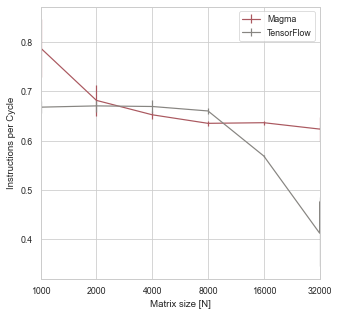

In [7]:
# measurements=reader.perf(hbs_kernel = 'svd', hbs_subkernel='TensorFlow', hbs_testcase = 0, hbs_ncores=1, agg='mean')
measurements=reader.perf(hbs_kernel = 'svd', hbs_testcase = 0, hbs_ncores=1)

fig, ax = plt.subplots(figsize=(5, 5))
# ax.set_yscale("log")
ax.set_xscale("log")
scalability_plot(ax, reader, measurements, 'ipc', x_axis='hbs_dataset', groupby='hbs_subkernel')
ax.set_xlabel('Matrix size [N]')
ax.set_xlim((1000, 32000))
ax.grid(True)
ax.legend(loc='upper right')
plt.savefig('svd_ipc.png', dpi=600, bbox_inches='tight', transparent=True)

In [8]:
read_summary_data(HBSReader('.'), cpu=False, hbs_kernel = 'svd', hbs_testcase = 0, hbs_dataset=32000, hbs_ncores=1)

hbs_testbed hbs_subkernel  inputs  elapsed_time     memory  outputs  \
0    amdMi100    TensorFlow     0.0        123.14  4799746.4     48.0   
1      nvA100         Magma     0.0         15.12  4042212.0      0.0   
2      nvA100    TensorFlow     0.0         97.34  4679746.4     48.0   

   instructions        cycles       ipc  
0  1.532395e+11  3.733599e+11  0.410978  
1  4.529413e+10  7.266355e+10  0.623339  
2  1.772395e+11  3.733599e+11  0.474820

In [9]:
prep_sns()
plot_summary_data(read_summary_data(HBSReader('.'), cpu=False, hbs_kernel = 'svd', hbs_testcase = 0, hbs_dataset=32000, hbs_ncores=1), xlabel='hbs_subkernel', core_plots=True)
plt.savefig('svd.png', dpi=600, bbox_inches='tight', transparent=True)

In [10]:
plot_summary_data(read_summary_data(HBSReader('.'), hbs_kernel = 'lge', hbs_testcase = 0, hbs_dataset = 'europe/ukraine', hbs_subkernel='routing_car'))
#plt.savefig('svg.png', dpi=600, bbox_inches='tight', transparent=True)